In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('saas.csv')

In [3]:
df.describe()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
count,7.904580e+05,7.904580e+05,790458.000000,790458.000000
mean,1.012913e+06,5.395228e+06,0.599235,2.996174
std,7.591992e+03,2.281857e+05,0.950380,4.751901
min,1.000000e+06,5.000000e+06,0.000000,0.000000
25%,1.006405e+06,5.197614e+06,0.000000,0.000000
50%,1.012797e+06,5.395228e+06,0.000000,0.000000
75%,1.019154e+06,5.592843e+06,1.000000,5.000000
max,1.029399e+06,5.790457e+06,4.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
Month_Invoiced       790458 non-null object
Customer_Id          790458 non-null int64
Invoice_Id           790458 non-null int64
Subscription_Type    790458 non-null float64
Amount               790458 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [5]:
df.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790458 entries, 0 to 790457
Data columns (total 5 columns):
Month_Invoiced       790458 non-null object
Customer_Id          790458 non-null int64
Invoice_Id           790458 non-null int64
Subscription_Type    790458 non-null float64
Amount               790458 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 36.2+ MB


In [6]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [7]:
df.tail()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
790453,2017-12-31,1029395,5790453,0.0,0.0
790454,2017-12-31,1029396,5790454,0.0,0.0
790455,2017-12-31,1029397,5790455,3.0,15.0
790456,2017-12-31,1029398,5790456,0.0,0.0
790457,2017-12-31,1029399,5790457,0.0,0.0


In [8]:
df.dtypes

Month_Invoiced        object
Customer_Id            int64
Invoice_Id             int64
Subscription_Type    float64
Amount               float64
dtype: object

In [9]:
df['Month_Invoiced'] = pd.to_datetime(df.Month_Invoiced)

In [10]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [11]:
df.dtypes

Month_Invoiced       datetime64[ns]
Customer_Id                   int64
Invoice_Id                    int64
Subscription_Type           float64
Amount                      float64
dtype: object

In [12]:
df = df.set_index('Month_Invoiced')

In [13]:
df.describe()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
count,7.904580e+05,7.904580e+05,790458.000000,790458.000000
mean,1.012913e+06,5.395228e+06,0.599235,2.996174
std,7.591992e+03,2.281857e+05,0.950380,4.751901
min,1.000000e+06,5.000000e+06,0.000000,0.000000
25%,1.006405e+06,5.197614e+06,0.000000,0.000000
50%,1.012797e+06,5.395228e+06,0.000000,0.000000
75%,1.019154e+06,5.592843e+06,1.000000,5.000000
max,1.029399e+06,5.790457e+06,4.000000,20.000000


In [14]:
df[:'2016']

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0
2014-01-31,1000005,5000005,2.0,10.0
2014-01-31,1000006,5000006,0.0,0.0
2014-01-31,1000007,5000007,0.0,0.0
2014-01-31,1000008,5000008,0.0,0.0


# Train / Test Split

In [15]:
aggregation = 'sum'

In [16]:
train = df[:'2016'].Amount.resample('M').agg(aggregation)
test = df['2017':].Amount.resample('M').agg(aggregation)

In [17]:
train

Month_Invoiced
2014-01-31    35850.0
2014-02-28    37190.0
2014-03-31    38295.0
2014-04-30    39255.0
2014-05-31    40355.0
2014-06-30    41255.0
2014-07-31    42170.0
2014-08-31    43210.0
2014-09-30    44075.0
2014-10-31    44880.0
2014-11-30    45545.0
2014-12-31    46210.0
2015-01-31    46945.0
2015-02-28    47520.0
2015-03-31    48025.0
2015-04-30    48560.0
2015-05-31    49025.0
2015-06-30    49485.0
2015-07-31    50105.0
2015-08-31    50495.0
2015-09-30    50985.0
2015-10-31    51445.0
2015-11-30    51260.0
2015-12-31    51505.0
2016-01-31    51955.0
2016-02-29    51955.0
2016-03-31    52000.0
2016-04-30    52190.0
2016-05-31    52325.0
2016-06-30    52435.0
2016-07-31    52695.0
2016-08-31    52940.0
2016-09-30    52975.0
2016-10-31    53190.0
2016-11-30    53375.0
2016-12-31    53320.0
Freq: M, Name: Amount, dtype: float64

In [18]:
test

Month_Invoiced
2017-01-31    53395.0
2017-02-28    53440.0
2017-03-31    53480.0
2017-04-30    53350.0
2017-05-31    53340.0
2017-06-30    53405.0
2017-07-31    53680.0
2017-08-31    53820.0
2017-09-30    53925.0
2017-10-31    53850.0
2017-11-30    53860.0
2017-12-31    53805.0
Freq: M, Name: Amount, dtype: float64

# Naive / Simple Average

In [19]:
yhat = pd.DataFrame(dict(actual=test))


In [20]:
yhat['avg_forecast'] = train.mean()


In [21]:
yhat.head()

,actual,avg_forecast
Month_Invoiced,,
2017-01-31,53395.0,47916.666667
2017-02-28,53440.0,47916.666667
2017-03-31,53480.0,47916.666667
2017-04-30,53350.0,47916.666667
2017-05-31,53340.0,47916.666667


In [22]:
def plot_data_and_predictions(predictions, label):
    plt.figure(figsize=(10, 8))

    plt.plot(train,label='Train')
    plt.plot(test, label='Test')
    plt.plot(predictions, label=label, linewidth=5)

    plt.legend(loc='best')
    plt.show()


def evaluate(actual, predictions, output=True):
    mse = metrics.mean_squared_error(actual, predictions)
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse    

def plot_and_eval(predictions, actual=test, metric_fmt='{:.2f}', linewidth=4):
    if type(predictions) is not list:
        predictions = [predictions]

    plt.figure(figsize=(16, 8))
    plt.plot(train,label='Train')
    plt.plot(test, label='Test')

    for yhat in predictions:
        mse, rmse = evaluate(actual, yhat, output=False)        
        label = f'{yhat.name}'
        if len(predictions) > 1:
            label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.plot(yhat, label=label, linewidth=linewidth)

    if len(predictions) == 1:
        label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.title(label)

    plt.legend(loc='best')
    plt.show()

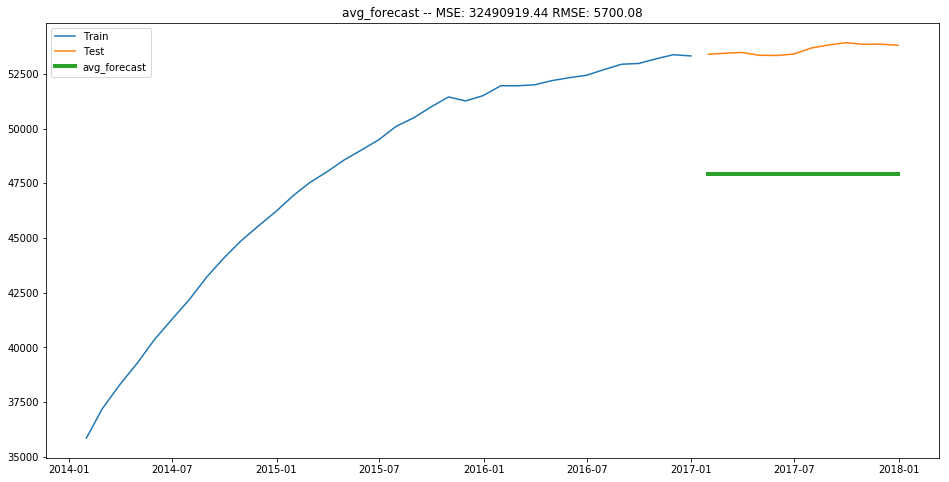

In [23]:
plot_and_eval(yhat.avg_forecast)


# Moving Average


In [24]:
periods = 30
yhat['moving_avg_forecast_3'] = train.rolling(3).mean().iloc[-1]


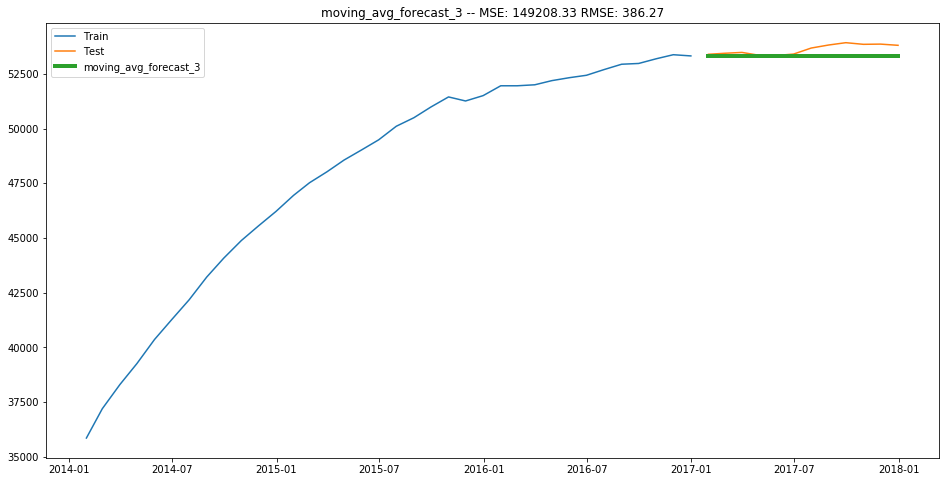

In [25]:
plot_and_eval(yhat.moving_avg_forecast_3)

In [26]:
yhat['moving_average_forecast_10'] = train.rolling(10).mean().iloc[-1]

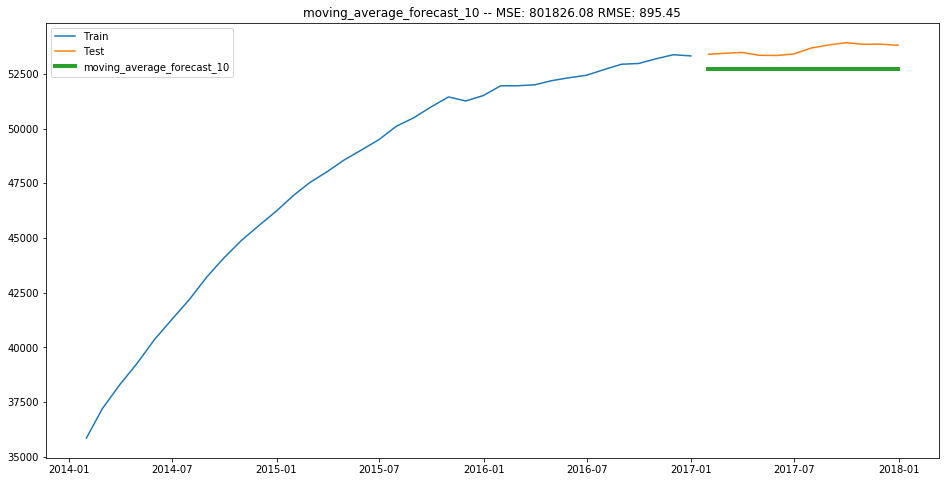

In [27]:
plot_and_eval(yhat.moving_average_forecast_10)

# Holts Linear Trend Model

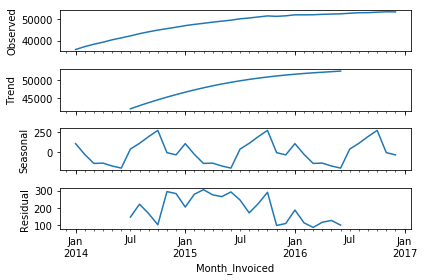

In [28]:
sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)
plt.show()

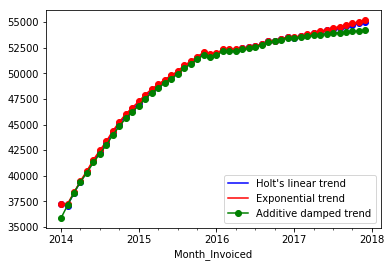

<Figure size 1080x1080 with 0 Axes>

In [29]:
from statsmodels.tsa.api import Holt
fit1 = Holt(train).fit(smoothing_level=0.9, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(train, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(train, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")

fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.figure(figsize=(15,15))
plt.show()

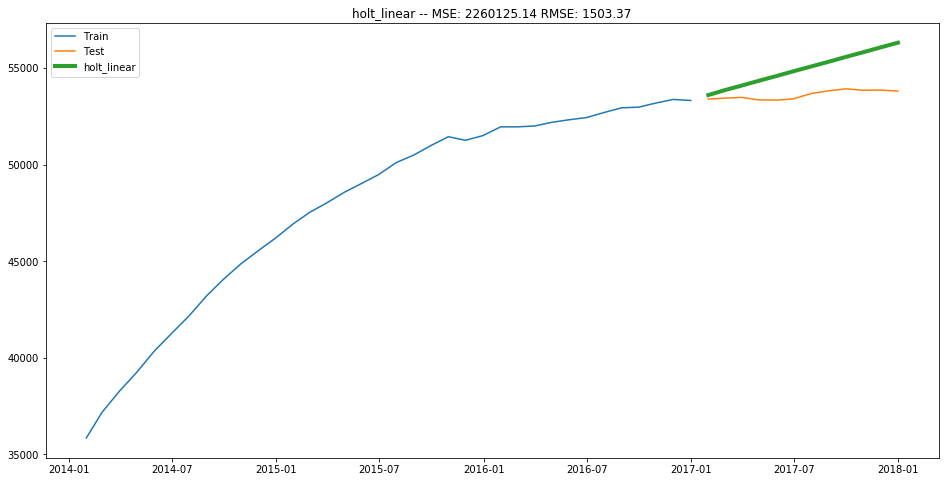

In [32]:

fit_a = Holt(train).fit(smoothing_level=.9, smoothing_slope=.1)

yhat['holt_linear'] = fit_a.forecast(test.shape[0])
test
plot_and_eval(yhat.holt_linear)


In [89]:
yhat.head()

,actual,avg_forecast,moving_avg_forecast_3,moving_average_forecast_10,holt_linear
Month_Invoiced,,,,,
2017-01-31,53395.0,47916.666667,53295.0,52744.5,53600.820267
2017-02-28,53440.0,47916.666667,53295.0,52744.5,53847.263178
2017-03-31,53480.0,47916.666667,53295.0,52744.5,54093.706088
2017-04-30,53350.0,47916.666667,53295.0,52744.5,54340.148998
2017-05-31,53340.0,47916.666667,53295.0,52744.5,54586.591908


# Simple Exponential Smoothing

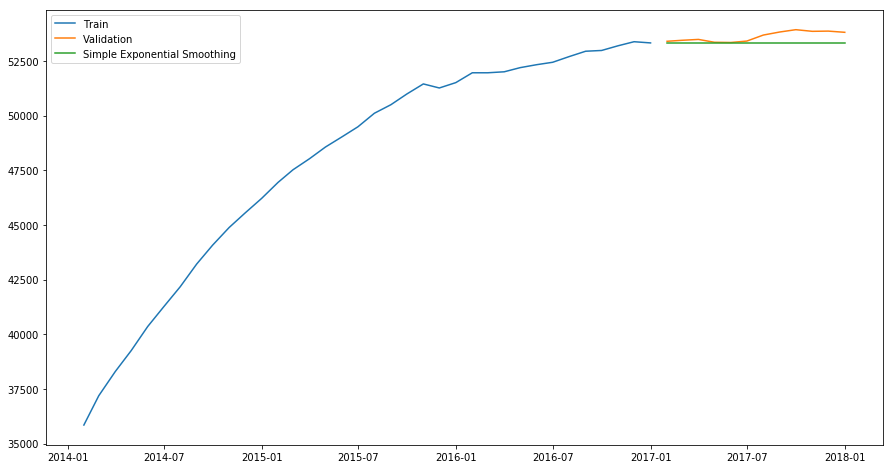

In [94]:
from statsmodels.tsa.api import SimpleExpSmoothing

y_hat = test.copy()
fit2 = SimpleExpSmoothing((train)).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(test))
plt.figure(figsize =(15,8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')


# Predicting Based on the last years data

In [107]:
train['2016']

Month_Invoiced
2016-01-31    51955.0
2016-02-29    51955.0
2016-03-31    52000.0
2016-04-30    52190.0
2016-05-31    52325.0
2016-06-30    52435.0
2016-07-31    52695.0
2016-08-31    52940.0
2016-09-30    52975.0
2016-10-31    53190.0
2016-11-30    53375.0
2016-12-31    53320.0
Freq: M, Name: Amount, dtype: float64

In [108]:
train['2016'].reset_index().drop(columns='Month_Invoiced').set_index(train['2016'].index + 3).iloc[:-1]

,Amount
Month_Invoiced,
2016-04-30,51955.0
2016-05-31,51955.0
2016-06-30,52000.0
2016-07-31,52190.0
2016-08-31,52325.0
2016-09-30,52435.0
2016-10-31,52695.0
2016-11-30,52940.0
2016-12-31,52975.0


In [96]:
# note that 2016 was a leap year
using_last_year = train['2016']\
    .reset_index()\
    .drop(columns='Amount')\
    .set_index(train['2016'].index + 366)\
    .iloc[:-1]

yhat['last_year'] = using_last_year

In [97]:
yhat

,actual,avg_forecast,moving_avg_forecast_3,moving_average_forecast_10,holt_linear,last_year
Month_Invoiced,,,,,,
2017-01-31,53395.0,47916.666667,53295.0,52744.5,53600.820267,NaT
2017-02-28,53440.0,47916.666667,53295.0,52744.5,53847.263178,NaT
2017-03-31,53480.0,47916.666667,53295.0,52744.5,54093.706088,NaT
2017-04-30,53350.0,47916.666667,53295.0,52744.5,54340.148998,NaT
2017-05-31,53340.0,47916.666667,53295.0,52744.5,54586.591908,NaT
2017-06-30,53405.0,47916.666667,53295.0,52744.5,54833.034818,NaT
2017-07-31,53680.0,47916.666667,53295.0,52744.5,55079.477728,NaT
2017-08-31,53820.0,47916.666667,53295.0,52744.5,55325.920639,NaT
2017-09-30,53925.0,47916.666667,53295.0,52744.5,55572.363549,NaT


# Prophet

![Image of Prophet](http://www.israel-a-history-of.com/images/EnochtheProphet.jpg)

In [2]:
from acquire import get_all_data
from prepare import prepare_data

item_id : int64
sale_amount : float64
sale_date : object
sale_id : int64
store_id : int64
item_brand : object
item_name : object
item_price : float64
item_upc12 : object
item_upc14 : object
store_address : object
store_city : object
store_state : object
store_zipcode : object


In [3]:
df = get_all_data()

In [ ]:
prepare_data(df)

In [9]:
df.isnull().sum()

item_id          0
sale_amount      0
sale_id          0
store_id         0
item_brand       0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_state      0
store_zipcode    0
sales_total      0
year             0
quarter          0
month            0
day_of_month     0
day_of_week      0
is_weekend       0
dtype: int64

In [14]:
df.shape

(913000, 20)

In [10]:
from fbprophet import Prophet
%matplotlib inline

In [19]:
d_df = df[df['store_id']==2]
d_df = d_df[d_df['item_brand']=='Kelloggs']

In [20]:
d_df.shape

(1826, 20)

In [21]:
d_df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,sales_total,year,quarter,month,day_of_month,day_of_week,is_weekend
sale_date,,,,,,,,,,,,,,,,,,,,
"Tue, 01 Jan 2013 00:00:00 GMT",45,45.0,805267,2,Kelloggs,Kelloggs Disney Pixar Cars 2 Cereal,4.4,38000542237,38000542237,9255 FM 471 West,San Antonio,TX,78251,198.0,2013,1,1,1,Tuesday,False
"Wed, 02 Jan 2013 00:00:00 GMT",45,50.0,805268,2,Kelloggs,Kelloggs Disney Pixar Cars 2 Cereal,4.4,38000542237,38000542237,9255 FM 471 West,San Antonio,TX,78251,220.0,2013,1,1,2,Wednesday,False
"Thu, 03 Jan 2013 00:00:00 GMT",45,56.0,805269,2,Kelloggs,Kelloggs Disney Pixar Cars 2 Cereal,4.4,38000542237,38000542237,9255 FM 471 West,San Antonio,TX,78251,246.4,2013,1,1,3,Thursday,False
"Fri, 04 Jan 2013 00:00:00 GMT",45,57.0,805270,2,Kelloggs,Kelloggs Disney Pixar Cars 2 Cereal,4.4,38000542237,38000542237,9255 FM 471 West,San Antonio,TX,78251,250.8,2013,1,1,4,Friday,False
"Sat, 05 Jan 2013 00:00:00 GMT",45,78.0,805271,2,Kelloggs,Kelloggs Disney Pixar Cars 2 Cereal,4.4,38000542237,38000542237,9255 FM 471 West,San Antonio,TX,78251,343.2,2013,1,1,5,Saturday,True


In [23]:
df.index

Index(['Tue, 01 Jan 2013 00:00:00 GMT', 'Wed, 02 Jan 2013 00:00:00 GMT',
       'Thu, 03 Jan 2013 00:00:00 GMT', 'Fri, 04 Jan 2013 00:00:00 GMT',
       'Sat, 05 Jan 2013 00:00:00 GMT', 'Sun, 06 Jan 2013 00:00:00 GMT',
       'Mon, 07 Jan 2013 00:00:00 GMT', 'Tue, 08 Jan 2013 00:00:00 GMT',
       'Wed, 09 Jan 2013 00:00:00 GMT', 'Thu, 10 Jan 2013 00:00:00 GMT',
       ...
       'Fri, 22 Dec 2017 00:00:00 GMT', 'Sat, 23 Dec 2017 00:00:00 GMT',
       'Sun, 24 Dec 2017 00:00:00 GMT', 'Mon, 25 Dec 2017 00:00:00 GMT',
       'Tue, 26 Dec 2017 00:00:00 GMT', 'Wed, 27 Dec 2017 00:00:00 GMT',
       'Thu, 28 Dec 2017 00:00:00 GMT', 'Fri, 29 Dec 2017 00:00:00 GMT',
       'Sat, 30 Dec 2017 00:00:00 GMT', 'Sun, 31 Dec 2017 00:00:00 GMT'],
      dtype='object', name='sale_date', length=913000)

In [24]:
d_df['y'] = d_df.sales_total
d_df['ds'] = pd.to_datetime(d_df.index)
d_df = d_df.groupby(['ds'])['y'].sum().reset_index()

In [25]:
d_df.head()

,ds,y
0,2013-01-01,198.0
1,2013-01-02,220.0
2,2013-01-03,246.4
3,2013-01-04,250.8
4,2013-01-05,343.2


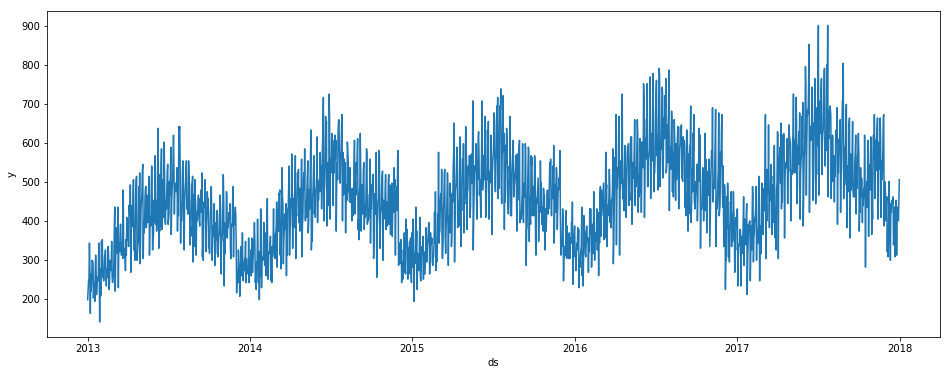

In [30]:
plt.figure(figsize=(16,6))
sns.lineplot(d_df.ds, d_df.y)

In [31]:
d_df['cap'] = 600
d_df['floor'] = 100

m = Prophet(daily_seasonality=True, growth='logistic', changepoint_range=0.9)
m.fit(d_df)

In [40]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 600
future['floor'] = 100
print(future.head())
print(future.tail())
print(d_df.tail())

          ds  cap  floor
0 2013-01-01  600    100
1 2013-01-02  600    100
2 2013-01-03  600    100
3 2013-01-04  600    100
4 2013-01-05  600    100
             ds  cap  floor
2186 2018-12-27  600    100
2187 2018-12-28  600    100
2188 2018-12-29  600    100
2189 2018-12-30  600    100
2190 2018-12-31  600    100
             ds      y  cap  floor
1821 2017-12-27  435.6  600    100
1822 2017-12-28  435.6  600    100
1823 2017-12-29  400.4  600    100
1824 2017-12-30  444.4  600    100
1825 2017-12-31  506.0  600    100


In [41]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2186,2018-12-27,428.094641,363.034461,492.193053
2187,2018-12-28,461.829524,398.271414,522.349940
2188,2018-12-29,493.282133,434.417713,557.049479
2189,2018-12-30,517.025633,452.468615,580.506864
2190,2018-12-31,334.826477,269.013670,397.903421


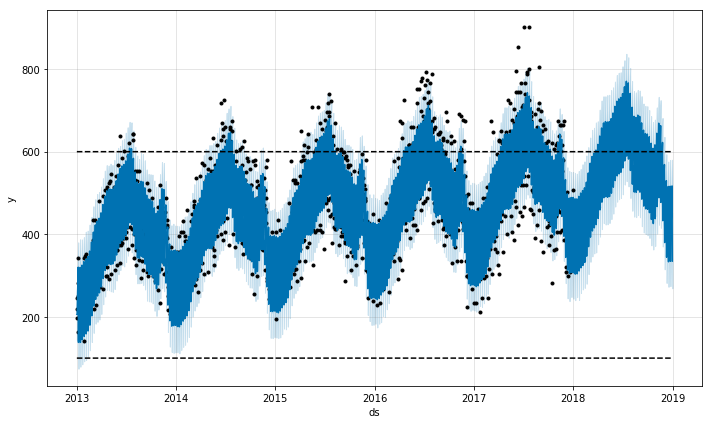

In [42]:
fig1 = m.plot(forecast)

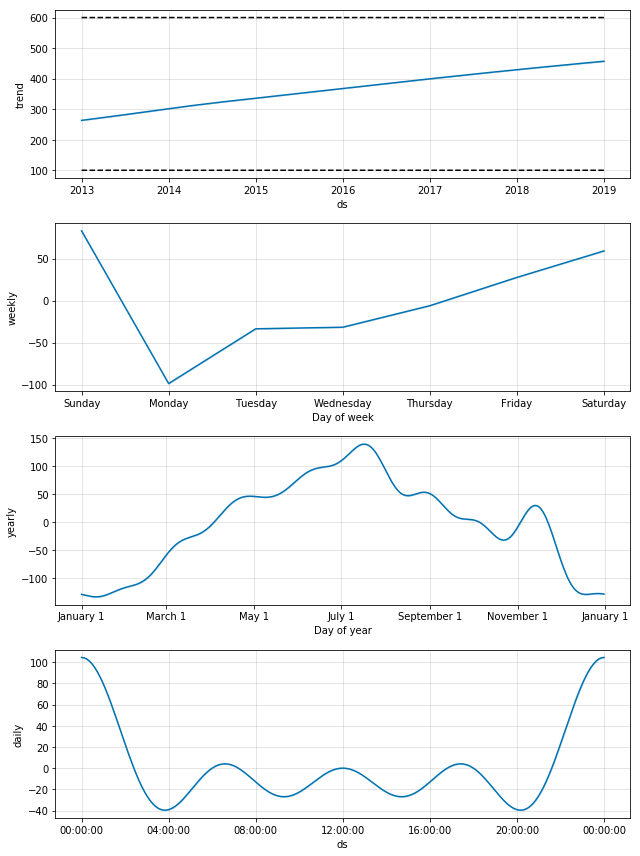

In [43]:
fig2 = m.plot_components(forecast)


In [44]:
from fbprophet.diagnostics import cross_validation, performance_metrics
# cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')
df_cv = cross_validation(m, horizon='90 days')


df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 33 forecasts with cutoffs between 2013-10-23 00:00:00 and 2017-10-02 00:00:00


,horizon,mse,rmse,mae,mape,coverage
278,9 days,3172.911898,56.328606,46.342782,0.106638,0.649832
1899,10 days,3241.534977,56.934480,46.781574,0.107159,0.646465
369,10 days,3227.913303,56.814728,46.654042,0.106826,0.649832
639,10 days,3213.295850,56.685940,46.453264,0.106076,0.653199
729,10 days,3230.335578,56.836041,46.554490,0.106455,0.653199


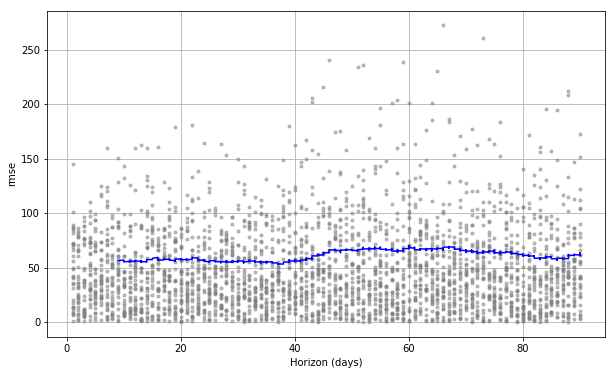

In [45]:
from fbprophet.plot import plot_cross_validation_metric, plot_forecast_component

# plot_forecast_component(m, forecast, 'yhat')

fig3 = plot_cross_validation_metric(df_cv, metric='rmse')